# Week 10 Independent Lab: Data Reduction

**Author**: Brady Woods  
**Course**: BGEN632 Grad. Intro. to Python  
**Term**: Spring 2025  
**Date**: May 07, 2025  

This notebook contains code completing the week ten independent lab. 

#### Imports and Setting Directory

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# for pca
from sklearn import preprocessing
from sklearn.decomposition import PCA as pca

# for factor analysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# for k-means clustering 
import sklearn.metrics as metcs
from scipy.cluster import hierarchy as hier
from sklearn import cluster as cls
from sklearn.cluster import KMeans

# for decision tree 
from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree

# modules for plotting trees
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

In [2]:
os.chdir("/Users/bradywoods/Desktop/week10labs-1/data")
os.getcwd() 

'/Users/bradywoods/Desktop/week10labs-1/data'

In [3]:
cali_df = pd.read_csv("calihospital.txt", sep= "\t")
cali_df.head()

,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,...,AvlBeds,Work_ID,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,135520.2186,20523425.53,...,15,721586,Web,David,M,4,Safety Inspection Member,23987,2,1/1/2012
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,136156.6913,33447542.78,...,99,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,197094.2541,37254178.67,...,107,926378,Adamson,David,M,1,Regional Representative,46978,4,1/1/2012
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,139170.3798,23385570.10,...,55,856720,Roberts,Melissa,F,4,Safety Inspection Member,23987,2,1/1/2009
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,116797.8306,13684502.49,...,42,909709,Iwata,Akira,M,1,Regional Representative,46978,4,1/1/2011


## Regression Trees

#### Operating Income

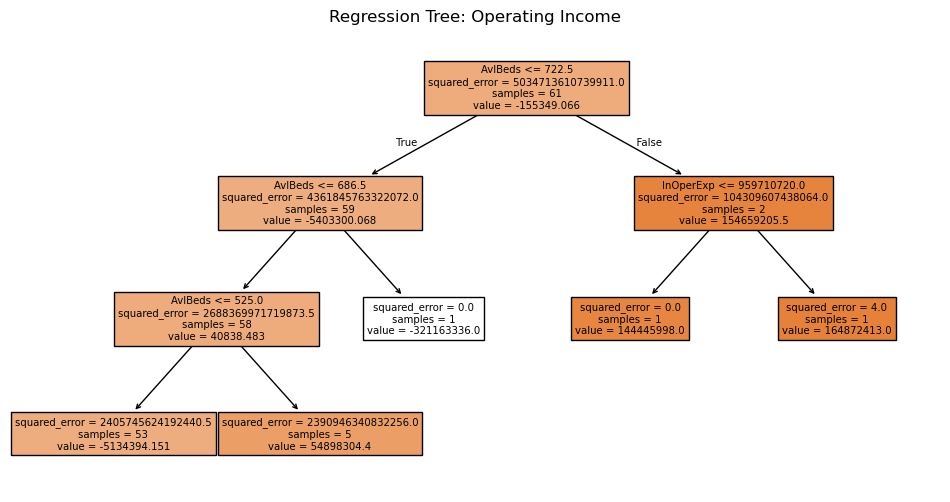

In [6]:
features = ['InOperExp', 'AvlBeds', 'Teaching']
target = 'OperInc'
tree_df = cali_df[features + [target]].dropna()

tree_df['Teaching'] = tree_df['Teaching'].astype('category').cat.codes

X = tree_df[features]
y = tree_df[target]

reg_tree = tree.DecisionTreeRegressor(max_depth=3, random_state=42)
reg_tree.fit(X, y)

plt.figure(figsize=(12, 6))
tree.plot_tree(reg_tree, feature_names=features, filled=True)
plt.title("Regression Tree: Operating Income")
plt.show()

Using this tree, we have a few valuable insights. Available beds is the strongest predictor of oeprating income; this is likely due to hospital size. These larger hosptials tend to turn larger profits as well. And lastly the richest and poorest hospitals can be distinguished quite easily by a regression tree.

#### Operating Revenue

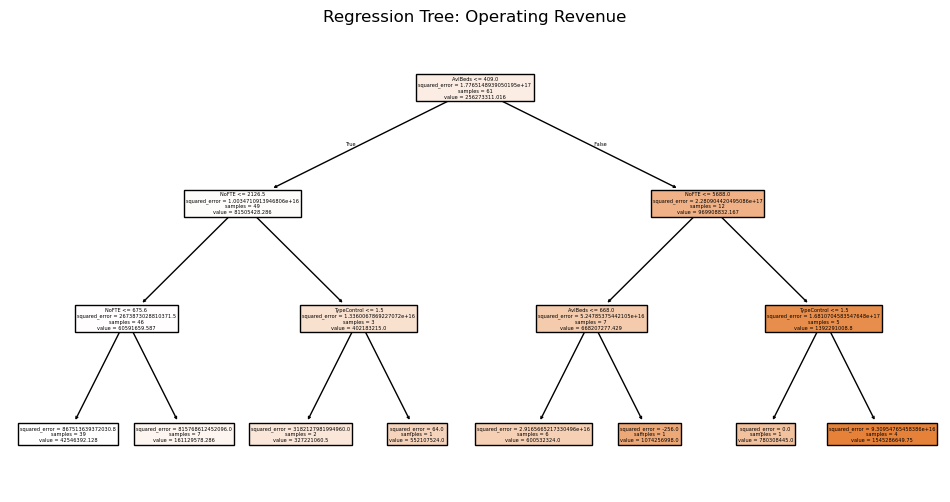

In [8]:
features = ['AvlBeds', 'NoFTE', 'TypeControl']
target = 'OperRev'
tree_df2 = cali_df[features + [target]].dropna()

tree_df2['TypeControl'] = tree_df2['TypeControl'].astype('category').cat.codes

X2 = tree_df2[features]
y2 = tree_df2[target]

reg_tree2 = tree.DecisionTreeRegressor(max_depth=3, random_state=42)
reg_tree2.fit(X2, y2)

plt.figure(figsize=(12, 6))
tree.plot_tree(reg_tree2, feature_names=features, filled=True)
plt.title("Regression Tree: Operating Revenue")
plt.show()


It may be quite hard to read on github, but this tree has some valuable insights as well. The left branch is out smaller hospitals and the right is the larger ones. Similar to the prior tree, available beds is a key predictor of operating revenue. Staff size is also a good indicator of operating revenue. This tree gives an intuitive look at what separates revenue levels.

#### Type Control

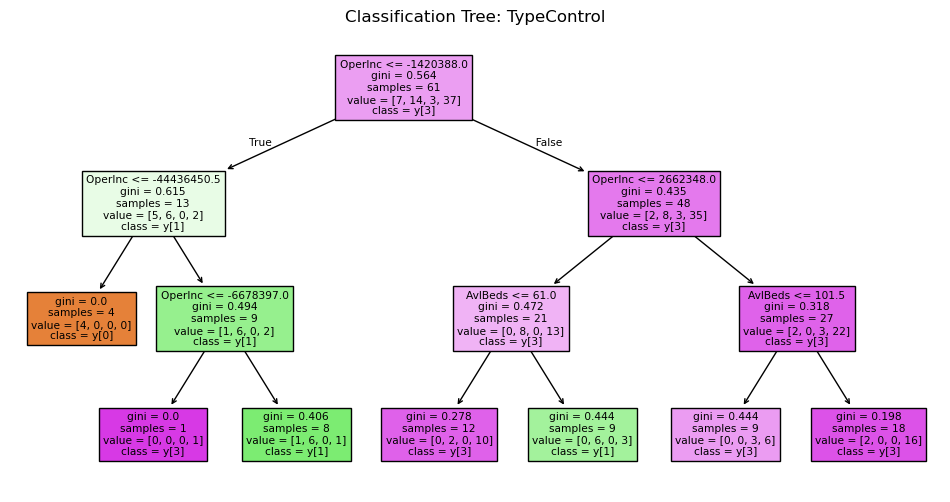

In [10]:
features = ['AvlBeds', 'Teaching', 'OperInc']
target = 'TypeControl'
tree_df3 = cali_df[features + [target]].dropna()

tree_df3['Teaching'] = tree_df3['Teaching'].astype('category').cat.codes
tree_df3['TypeControl'] = tree_df3['TypeControl'].astype('category').cat.codes

X3 = tree_df3[features]
y3 = tree_df3[target]

clf_tree = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
clf_tree.fit(X3, y3)

plt.figure(figsize=(12, 6))
tree.plot_tree(clf_tree, feature_names=features, class_names=True, filled=True)
plt.title("Classification Tree: TypeControl")
plt.show()

This tree is slightly more complicated than the first two. The strongest predictors of Type Control are available beds and operating income. Based on the the branches of this tree, we can determine that Type Control = 3 is a high income, large hosptial. Other than that, lower income hospitals have more variety of variables.

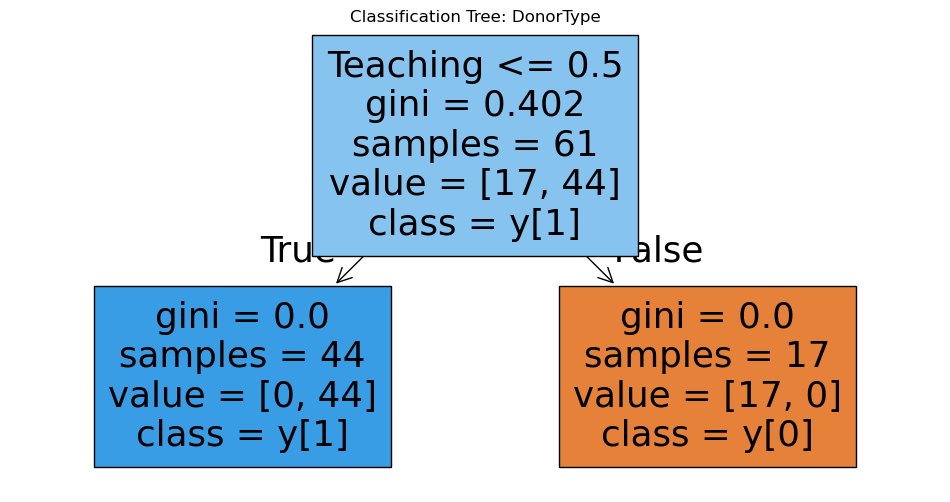

In [11]:
features = ['NoFTE', 'Teaching', 'OperRev']
target = 'DonorType'
tree_df4 = cali_df[features + [target]].dropna()

tree_df4['Teaching'] = tree_df4['Teaching'].astype('category').cat.codes
tree_df4['DonorType'] = tree_df4['DonorType'].astype('category').cat.codes

X4 = tree_df4[features]
y4 = tree_df4[target]

clf_tree2 = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
clf_tree2.fit(X4, y4)

plt.figure(figsize=(12, 6))
tree.plot_tree(clf_tree2, feature_names=features, class_names=True, filled=True)
plt.title("Classification Tree: DonorType")
plt.show()

Based on this tree, Teaching alone is indicative of DonorType. This indicates a very strong relationship between the teaching status and the donor base.

Since this last tree is so simple and has just one variable, that is technically the most efficient model. I believe something here may be incorrect or potentially a coincidence due to the sample size. So I will also mention my second place model which is the operating income model. This model followed logical steps and was a good mix of simplistic reasoning and also clean breaks between branches.